<a href="https://colab.research.google.com/github/DeisyData/ML_RegresionLogistica/blob/main/Explorador_RLOG_MatrizConfusion_LimDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

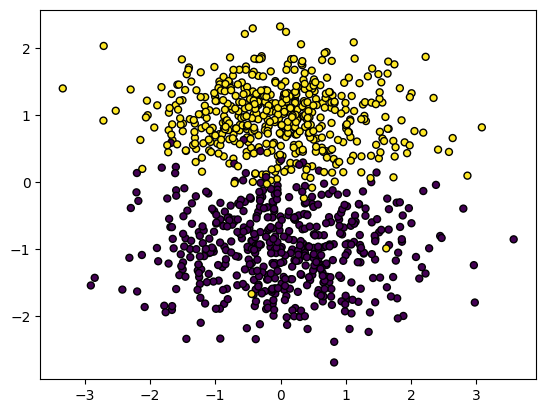

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X1, Y1 = make_classification(
    n_samples = 1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [ ]:
#entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
#aqui defino el tipo de entrenamiento osea por regresion logistica
regresion = LogisticRegression()
#aqui hago el entrenamiento
regresion.fit(X_train, y_train)
#saco la predicion, valores hipoteticos
y_pred = regresion.predict(X_test)

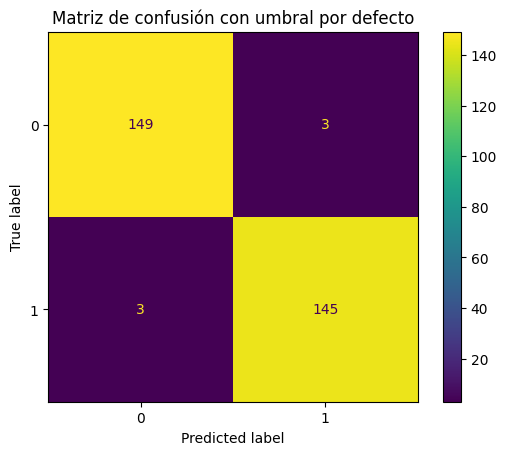

In [ ]:
#matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión con umbral por defecto")
plt.show()

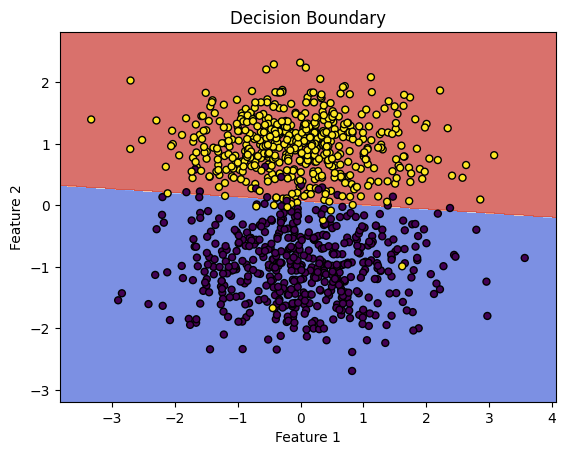

In [ ]:
#se crea una malla
x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = regresion.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) #se predice cada punto de la malla
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm) #se traza el limite de decision
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()
